In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TensorNetwork import TensorNetwork as TN
from QFTMPO import QFTMPO
from prepare_network import *

# Entangled States Preperation

### Entangling layers applied up to given depth

In [2]:
mps, t = prepare_entangled_state(8, depth=3)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 7.578 ms
Bond-dims: (2, 4, 8, 16, 8, 4, 2)


In [3]:
mps, t = prepare_entangled_state(8, depth=300)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 107.088 ms
Bond-dims: (2, 4, 8, 16, 8, 4, 2)


In [4]:
mps, t = prepare_entangled_state(12, depth=3)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 46.227 ms
Bond-dims: (2, 4, 8, 16, 32, 64, 32, 16, 8, 4, 2)


In [5]:
mps, t = prepare_entangled_state(12, depth=300)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 1900.287 ms
Bond-dims: (2, 4, 8, 16, 32, 64, 32, 16, 8, 4, 2)


### Absolutely Maximally Entangled (AME) State
DOI: 10.1103/PhysRevA.100.022342

In [6]:
mps, t = prepare_AME_state(8)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 1.902 ms
Bond-dims: (2, 4, 8, 8, 8, 4, 2)


In [7]:
mps, t = prepare_AME_state(12)
print(f"Runtime: {t:.3f} ms")
print(f"Bond-dims: {mps.get_bond_dims()}")

Runtime: 3.272 ms
Bond-dims: (2, 4, 8, 8, 8, 8, 8, 8, 8, 4, 2)


# QFT: Gate Ansatz vs MPO Ansatz (without limitations)

### States preperation:

In [8]:
N = (4, 6, 8, 10, 12, 14, 16)
states = [prepare_entangled_state(N=n)[0] for n in N]

### Gate Ansatz:

In [9]:
gate_times = []
gate_result_states = []
for mps0 in states:
    mps, t = qft_with_gates(mps0, max_bond=None)
    gate_times.append(t)
    gate_result_states.append(mps)
    print(t)
    
print(gate_times)

2.32
3.782
9.822
38.205999999999996
446.82
2914.771
24481.559
[2.32, 3.782, 9.822, 38.205999999999996, 446.82, 2914.771, 24481.559]


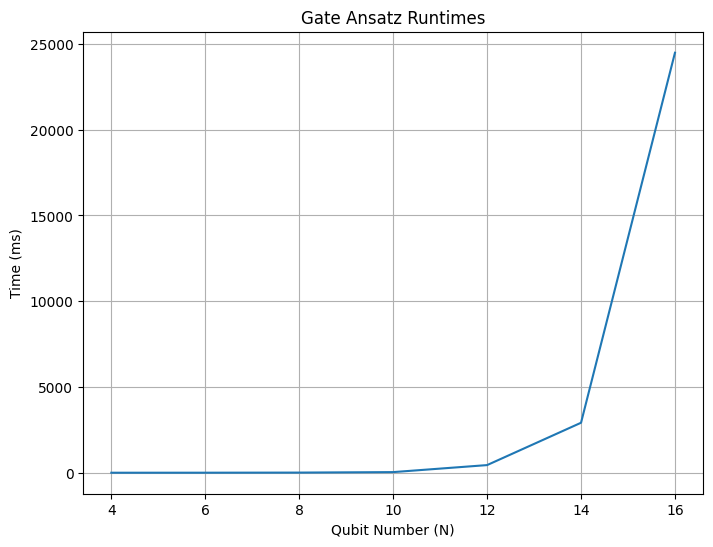

In [10]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("Gate Ansatz Runtimes")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Time (ms)")

plt.plot(N, gate_times)
plt.show()

[4, 8, 16, 32, 64, 128, 256]


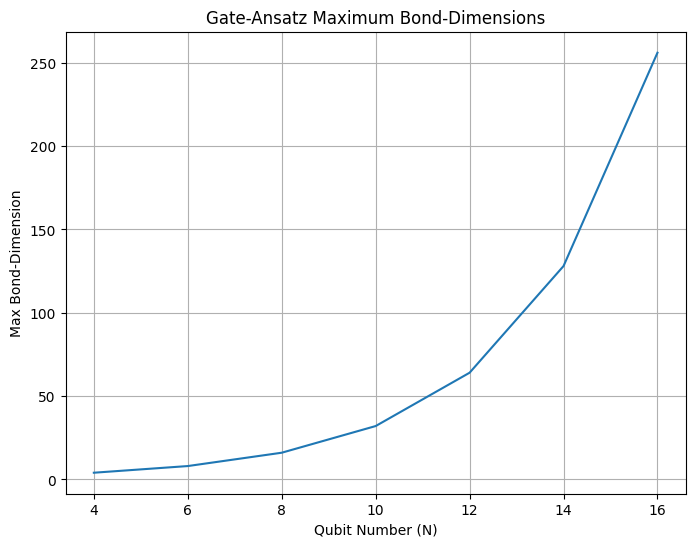

In [11]:
max_dims = [max(mps.get_bond_dims()) for mps in gate_result_states]
print(max_dims)

plt.figure(figsize=(8, 6))
plt.grid()

plt.title("Gate-Ansatz Maximum Bond-Dimensions")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Max Bond-Dimension")

plt.plot(N, max_dims)
plt.show()

### QFT-MPO Ansatz:

In [12]:
mpo_times = []
mpo_result_states = []
for mps0 in states[:5]:
    mps, t = qft_with_mpo(mps0, max_bond=None)
    mpo_times.append(t)
    mpo_result_states.append(mps)
    print(t)
    
print(mpo_times)

0.898
3.52
112.431
2068.273
77039.495
[0.898, 3.52, 112.431, 2068.273, 77039.495]


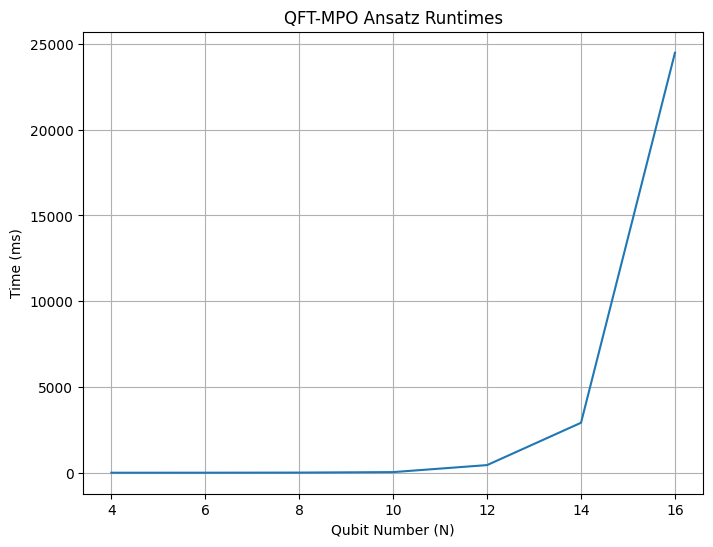

In [13]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO Ansatz Runtimes")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Time (ms)")

plt.plot(N, gate_times)
plt.show()

[8, 16, 64, 128, 512]


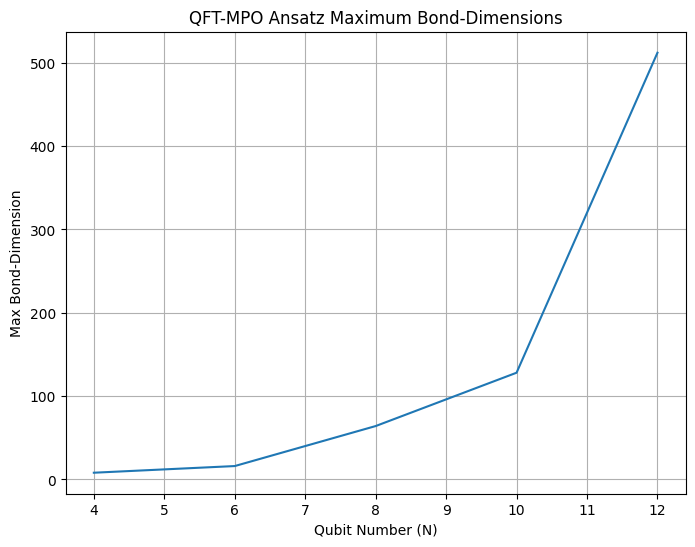

In [14]:
max_dims = [max(mps.get_bond_dims()) for mps in mpo_result_states]
print(max_dims)

plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO Ansatz Maximum Bond-Dimensions")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Max Bond-Dimension")

plt.plot(N[:len(max_dims)], max_dims)
plt.show()

### Comparison:

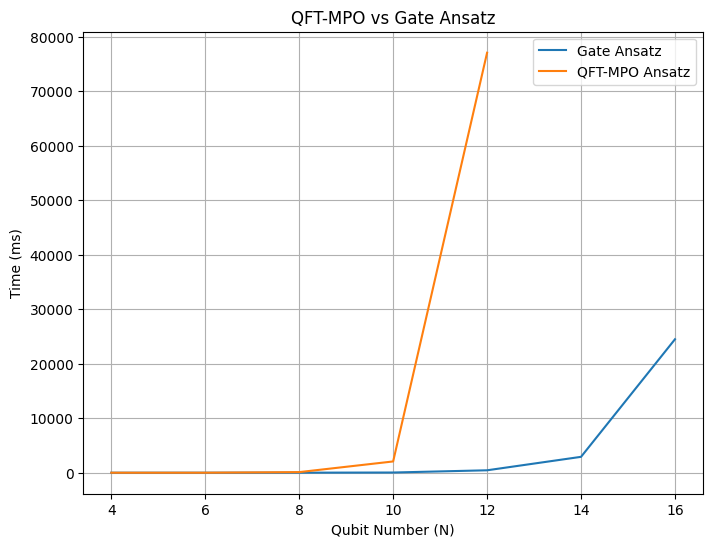

In [15]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO vs Gate Ansatz")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Time (ms)")

plt.plot(N, gate_times, label="Gate Ansatz")
plt.plot(N[:len(mpo_times)], mpo_times, label="QFT-MPO Ansatz")

plt.legend()
plt.show()

# QFT: Gate Ansatz vs MPO Ansatz (with bounded Bond-Dimensions)

In [16]:
max_dims = (1, 2, 4, 8, 16, 32, 64, 128, 256)

In [17]:
gate_times_N = []
gate_result_states_N = []

for mps0 in states:
    gate_times = []
    gate_result_states = []
    
    for bond in max_dims:
        mps, t = qft_with_gates(mps0, max_bond=bond)
        gate_times.append(t)
        gate_result_states.append(mps)
    
    gate_times_N.append(gate_times)
    gate_result_states_N.append(gate_result_states)
    print(f"N={len(mps0)}: {gate_times}")

N=4: [0.553, 0.768, 1.531, 0.372, 0.355, 0.35, 0.34600000000000003, 0.34600000000000003, 0.639]
N=6: [1.342, 1.399, 1.498, 1.6039999999999999, 1.485, 1.48, 1.4760000000000002, 1.48, 1.47]
N=8: [2.977, 3.0100000000000002, 3.658, 5.105, 5.5649999999999995, 5.577, 5.6080000000000005, 5.657, 5.624]
N=10: [7.149, 6.04, 8.112, 12.148000000000001, 23.695999999999998, 29.296, 29.461000000000002, 28.396, 28.913999999999998]
N=12: [12.308, 9.783, 12.574, 22.203, 56.599, 270.188, 323.041, 290.518, 291.173]
N=14: [25.04, 27.325, 28.840999999999998, 52.768, 133.631, 638.528, 2046.0790000000002, 3726.726, 3072.264]
N=16: [35.499, 39.698, 46.07, 108.247, 204.49200000000002, 1162.113, 5737.619, 19663.398, 35615.026]


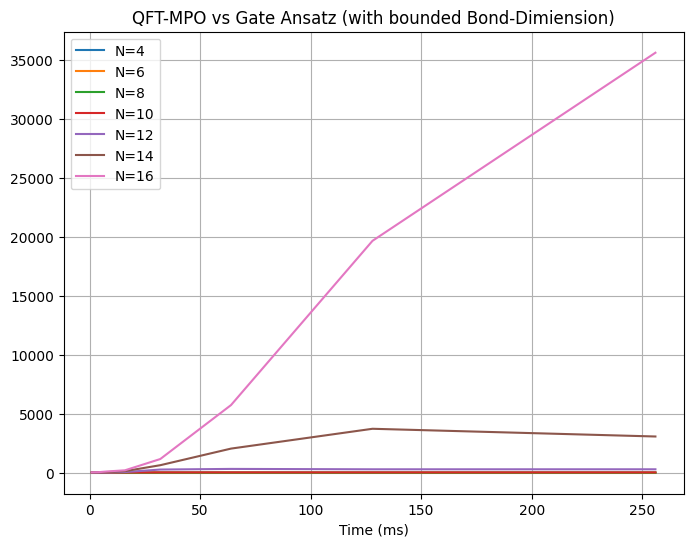

In [18]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO vs Gate Ansatz (with bounded Bond-Dimiension)")
plt.xlabel("Max. Bond-Dimension")
plt.xlabel("Time (ms)")

for n, lst in enumerate(gate_times_N):
    plt.plot(max_dims, lst, label=f"N={N[n]}")

#plt.xlim(right=160)
#plt.ylim(top=15000)

plt.legend()
plt.show()

In [19]:
mpo_times_N = []
mpo_result_states_N = []

for mps0 in states[:4]:
    mpo_times = []
    mpo_result_states = []
    
    for bond in max_dims[:4]:
        mps, t = qft_with_mpo(mps0, max_bond=bond)
        mpo_times.append(t)
        mpo_result_states.append(mps)
    
    mpo_times_N.append(mpo_times)
    mpo_result_states_N.append(mpo_result_states)
    print(f"N={len(mps0)}: {mpo_times}")

N=4: [1.351, 1.946, 1.2730000000000001, 0.426]
N=6: [0.614, 0.605, 1.633, 3.191]
N=8: [0.9940000000000001, 1.456, 13.718, 116.165]
N=10: [2.346, 5.531000000000001, 58.196, 397.246]


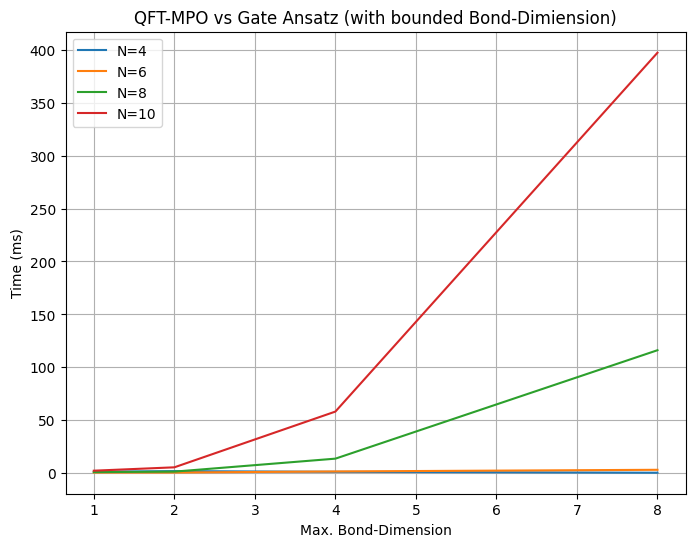

In [20]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO vs Gate Ansatz (with bounded Bond-Dimiension)")
plt.xlabel("Max. Bond-Dimension")
plt.ylabel("Time (ms)")

for n, lst in enumerate(mpo_times_N):
    plt.plot(max_dims[:len(lst)], lst, label=f"N={N[n]}")

plt.legend()
plt.show()